<a href="https://colab.research.google.com/github/PsorTheDoctor/artificial-intelligence/blob/master/modern_approach/text_to_image/instruct_pix2pix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#InstructPix2Pix

In [ ]:
%pip install -q transformers accelerate torch
%pip install -q git+https://github.com/huggingface/diffusers.git

In [ ]:
import torch
from diffusers import StableDiffusionInstructPix2PixPipeline, EulerAncestralDiscreteScheduler
from PIL import Image

model_id = 'timbrooks/instruct-pix2pix'
pipe = StableDiffusionInstructPix2PixPipeline.from_pretrained(
    model_id, torch_dtype=torch.float16, safety_checker=None
)
pipe.to('cuda')
pipe.scheduler = EulerAncestralDiscreteScheduler.from_config(pipe.scheduler.config)

  0%|          | 0/20 [00:00<?, ?it/s]

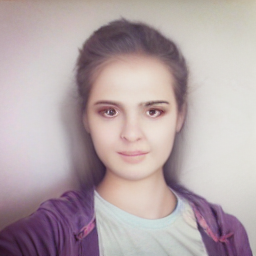

In [66]:
prompt = 'turn him into a girl'
img = Image.open('adam.jpg').resize((256, 256))

def generate(img, prompt):
  images = pipe(prompt, image=img, num_inference_steps=20, guidance_scale=7.5, 
                image_guidance_scale=1.5, num_images_per_prompt=1).images
  images[0].save('{}.jpg'.format(prompt))
  return images[0]

img1 = generate(img, prompt)
img1